# Volkswagen_used_car_EDA

### submited by: Subrata Saha
### Date: 12.03.2022

#### Objectives:
- Read dataset and EDA. 
- Bar plot and pie chart of transmission column. 
- Bar plot and pie chart of fuelType column. 
- Scatter plot
- Regression line
- Pair plot
- Box plot ,Violin plot and comparison

#### Contents of this Note book:
1. mport required libraries and packages and Read dataset
2. EDA
3. Pie Chart and Bar plot on transmission column
4. Pie Chart and Bar plot on fuelType column
5. Find the relation between the numerical variables- scatter plot and Regression line
6. Pairplot
7. Box plot and Violin plot

In [1]:
 #pip install notebook --upgrade

### 1. Import required libraries and packages and Read dataset

In [2]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [3]:
df = pd.read_csv("vw.csv")

#display(df.head())
# show 5 sample observations
display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
11112,Tiguan,2016,15491,Manual,39746,Diesel,58.9,2.0
14811,Amarok,2019,35899,Automatic,1854,Diesel,33.6,3.0
3836,Golf,2019,19290,Automatic,11256,Petrol,45.6,1.5
3431,Golf,2018,20791,Semi-Auto,38360,Diesel,57.7,2.0
14450,Touran,2013,8995,Manual,69000,Diesel,55.4,1.6


### 2. EDA

In [4]:
# Check for missing values, data types of the columns
df.info()

# Nan - not a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


In [5]:
# another way to check missing value
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

In [6]:
# shape
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(15157, 8)
number of rows =  15157
number of columns =  8


#### Count the number of unique values present in the 'year' column

In [7]:
print(df["year"].unique())

print(len(df["year"].unique()))

#print(df["year"].values)
print(df["year"].value_counts())

[2019 2020 2018 2017 2015 2016 2013 2014 2009 2010 2004 2003 2012 2011
 2008 2000 2006 2002 2005 2007 2001]
21
2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64


#### Count the number of unique values present in the 'model' column

In [8]:
print(df["model"].value_counts())

 Golf               4863
 Polo               3287
 Tiguan             1765
 Passat              915
 Up                  884
 T-Roc               733
 Touareg             363
 Touran              352
 T-Cross             300
 Golf SV             268
 Sharan              260
 Arteon              248
 Scirocco            242
 Amarok              111
 Caravelle           101
 CC                   95
 Tiguan Allspace      91
 Beetle               83
 Shuttle              61
 Caddy Maxi Life      59
 Jetta                32
 California           15
 Caddy Life            8
 Eos                   7
 Caddy                 6
 Fox                   4
 Caddy Maxi            4
Name: model, dtype: int64


#### Count the number of unique values present in the 'transmission' column

In [9]:
print(df["transmission"].value_counts())

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64


In [10]:
print(df["transmission"].unique())

print(len(df["transmission"].unique()))

['Automatic' 'Manual' 'Semi-Auto']
3


#### Count the number of unique values present in the 'engineSize' column

In [11]:
print(df["engineSize"].value_counts())

2.0    5570
1.0    3121
1.6    1629
1.4    1536
1.5    1446
1.2    1304
3.0     450
1.8      77
0.0      15
1.9       4
2.5       3
3.2       2
Name: engineSize, dtype: int64


#### Count the number of unique values present in the 'fuelType' column

In [12]:
print(df["fuelType"].value_counts())

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64


In [13]:
print(df["fuelType"].unique())
print(len(df["fuelType"].unique()))

['Diesel' 'Petrol' 'Other' 'Hybrid']
4


### 3. Pie Chart and Bar plot on transmission column

#### 3.1. Pie Chart on 'transmission' column

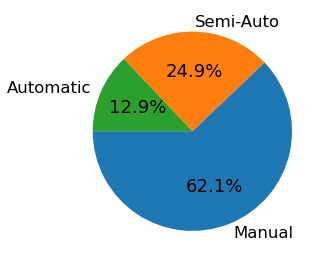

In [14]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.tight_layout()
plt.show()

#### 3.2.  Bar plot on 'transmission' column

In [15]:
print(df["transmission"].value_counts())

print(type(df["transmission"].value_counts()))

# convert to dataframe
df_transmission = pd.DataFrame(df["transmission"].value_counts())

display(df_transmission.head())
print(df_transmission.index)
print(df_transmission.columns)

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64
<class 'pandas.core.series.Series'>


,transmission
Manual,9417
Semi-Auto,3780
Automatic,1960


Index(['Manual', 'Semi-Auto', 'Automatic'], dtype='object')
Index(['transmission'], dtype='object')


In [16]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

# df_transmission = np.round(df_transmission, 2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,9417,62.13
1,Semi-Auto,3780,24.94
2,Automatic,1960,12.93


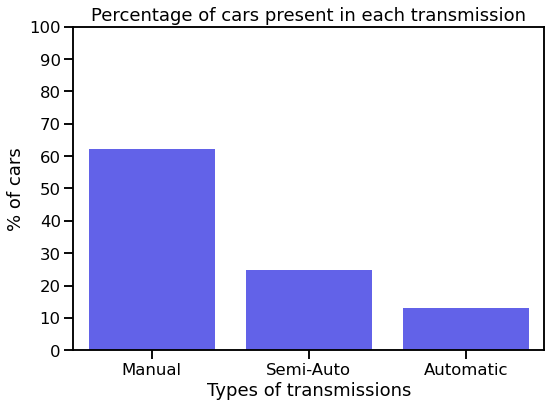

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="blue",
            alpha=0.7)

plt.xlabel("Types of transmissions")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")

plt.yticks(np.arange(0,101,10))
plt.tight_layout()
plt.show()

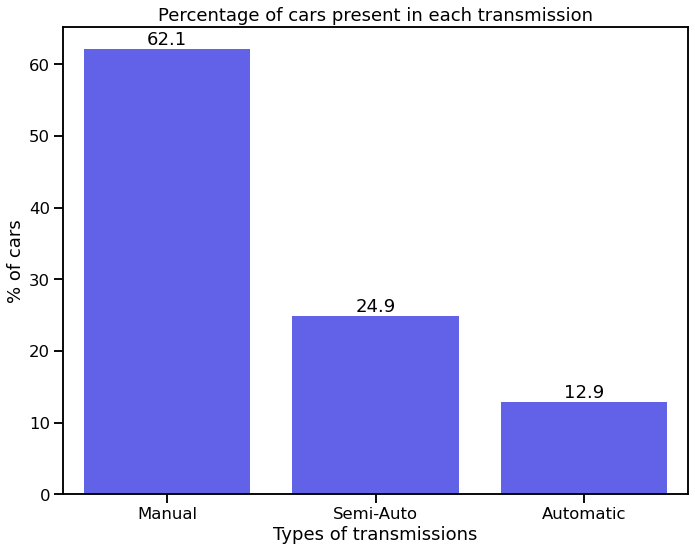

In [18]:
# using annotations

plt.figure(figsize=(10, 8))
splot=sns.barplot(x="transmission",y="% of cars",data=df_transmission,color="blue",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of transmissions")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")
plt.tight_layout()
plt.show()

 <br> **NOTE**: From Barplot and pie chart of the transmission column, we can notice that, More than half of the cars have Manual transmission and, almost 13% cars have automatic transmission which is the lowest among the three types of transmissions.

### 4. Pie Chart and Bar plot on fuelType column

#### 4.1. Pie Chart on 'fuelType' column

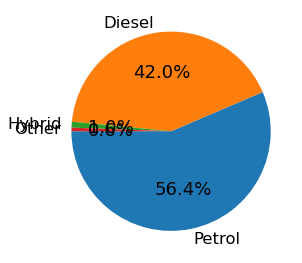

In [19]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.tight_layout()
plt.show()

 <br> **NOTE**: From pie chart of the fuelType column, we can notice that, More than half of the cars uses petrol as fuel.
 one problem with pie chart is that 'hybrid' and 'other' fuel type is indistinguishable,so we need another type of visualization.

#### 4.2.  Bar plot on 'fuelType' column

#### Find the percentage of unique values present in the 'fuelType' column

In [20]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,8553,56.43
1,Diesel,6372,42.04
2,Hybrid,145,0.96
3,Other,87,0.57


#### Create a Barplot for the 'fuelType' column

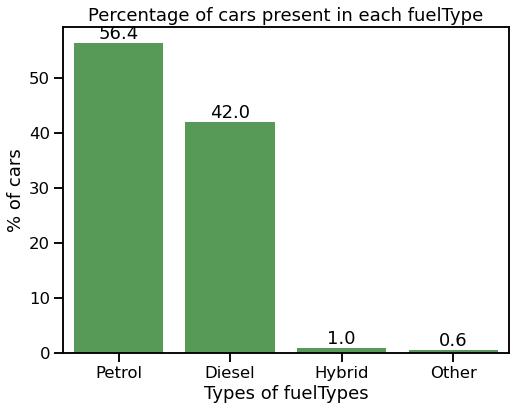

In [21]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="fuelType",y="% of cars",data=df_fuelType,color="g",alpha=0.7)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Types of fuelTypes")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")
plt.show()

 <br> **NOTE**: This visualization is better than pie chart, and we can deduce that hybrid and other fueltype is very negligible and almost zero compared to petrol and diesel fueltype.

### 5. Find the relation between the numerical variables- scatter plot and Regression line


- Scatterplot of mileage vs price
- Scatterplot of mpg vs price
- Scatterplot of engineSize vs price

<br> **NOTE**: price is target variable, all other columns represent feature variables.

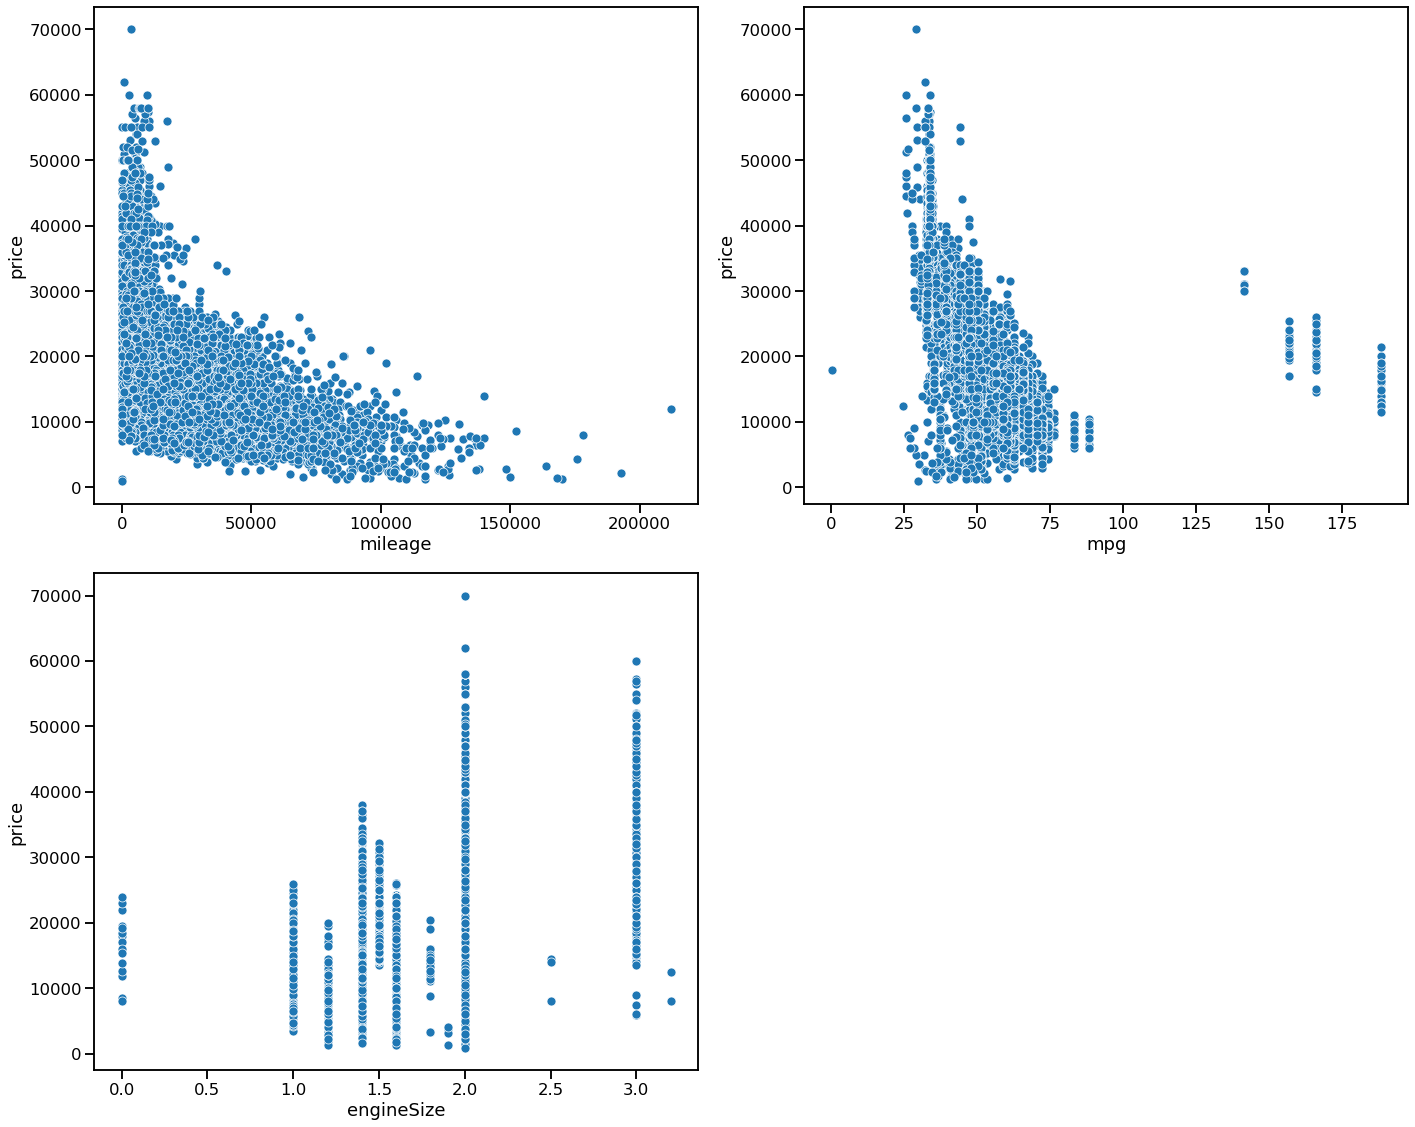

In [22]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df)

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df)

plt.tight_layout()
plt.show()

<br> **NOTE**: price is negatively correlated with mileage,which means cars with more mileage have less price. relationship of mpg and enginesize with price is not clear from scatter plot.

#### 5.1 using the hue parameter- fuelType

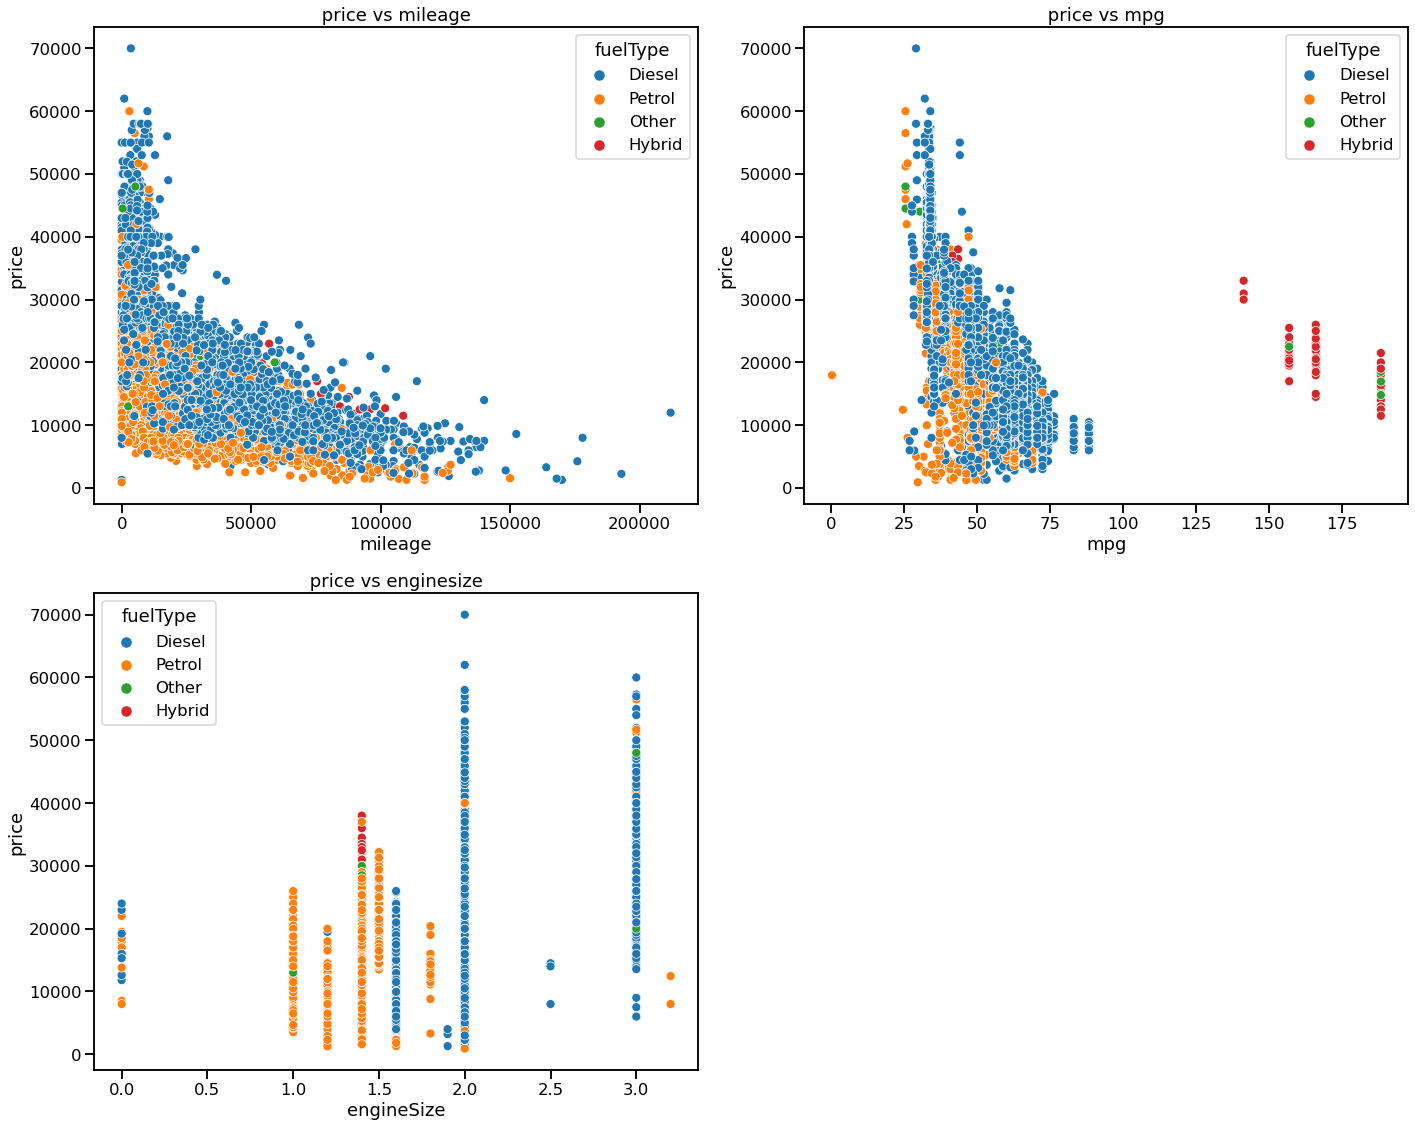

In [23]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
plt.title(" price vs mileage ")
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
plt.title(" price vs mpg ")
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 3)
plt.title(" price vs enginesize ")
sns.scatterplot(x="engineSize", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

<br> **NOTE**: According to all three plots, most petrol cars have lower price range.diesel cars are costlier irrespective of mileage. price of Hybrid cars varies from 12k to 24K $.

#### 5.2 using the hue parameter- transmission

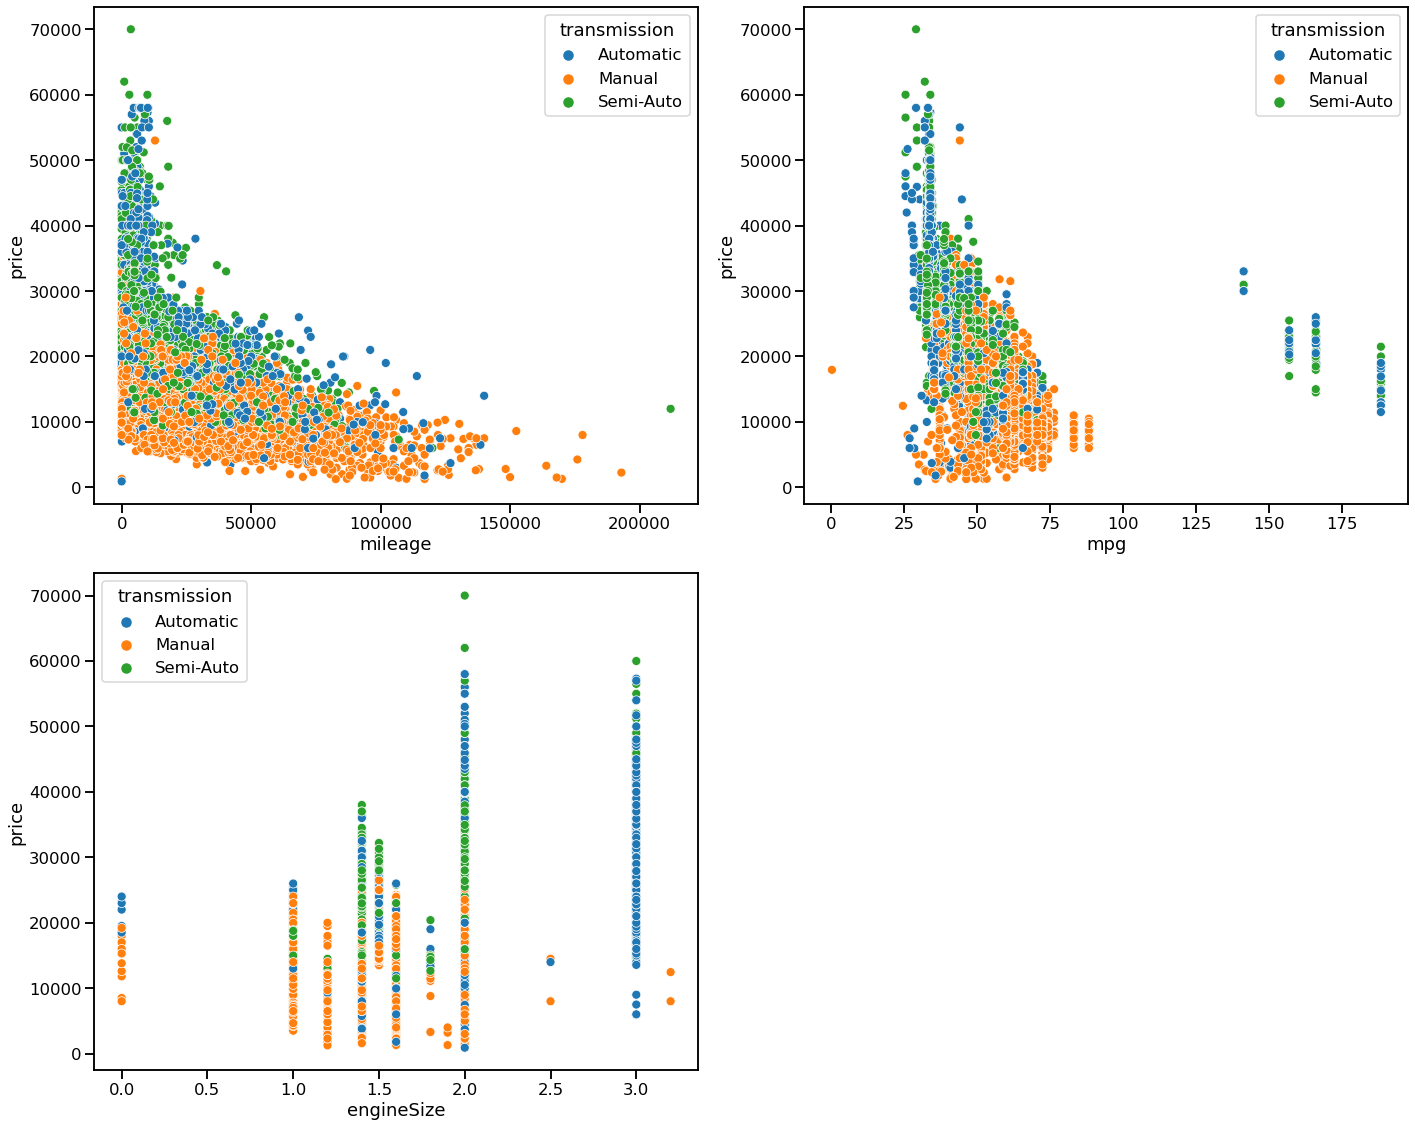

In [24]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

<br> **NOTE**: According to all three plots, most manual cars have lower price range.automatic cars are costlier irrespective of mileage, but in the low mileage(close to zero) semi automatic cars are expensive.

#### 5.3 Creating a trend line- price with mileage

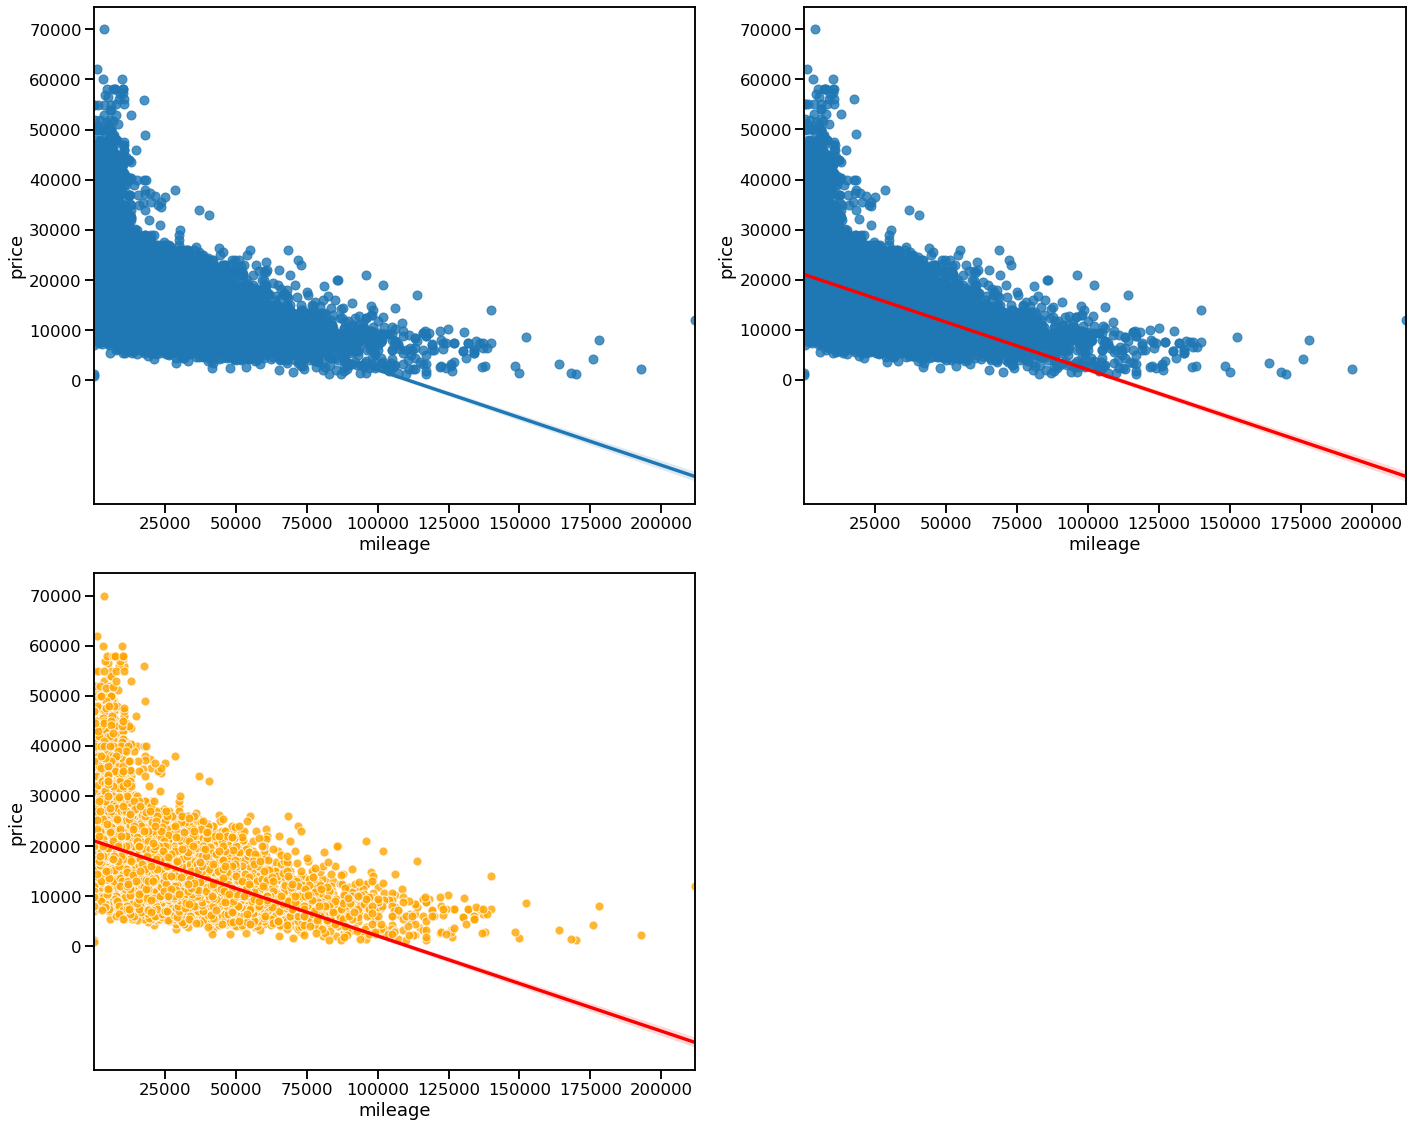

In [25]:
plt.figure(figsize=(20,16))


plt.subplot(2, 2, 1)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"red"})

plt.subplot(2, 2, 3)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df,line_kws={"color":"r"}, scatter_kws={"color":"orange", "edgecolor":"white"})
#  line_kws for line,  scatter_kws is for scatter plot 

plt.tight_layout()
plt.show()

<br> **NOTE**: Regression line clearly indicates negative relationship between price and mileage.

### 6. Pairplot

#### 6.1 Checking an example from the sea born documentation

In [26]:
penguins = sns.load_dataset("penguins") # preloaded dataset in seaborn

display(penguins.head())
print(penguins.shape)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(344, 7)


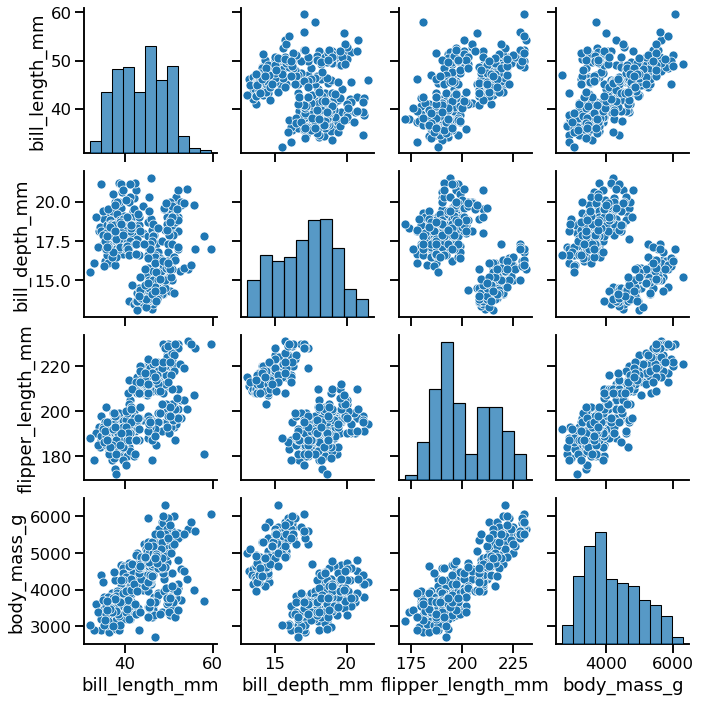

In [27]:
sns.pairplot(penguins)
plt.show()

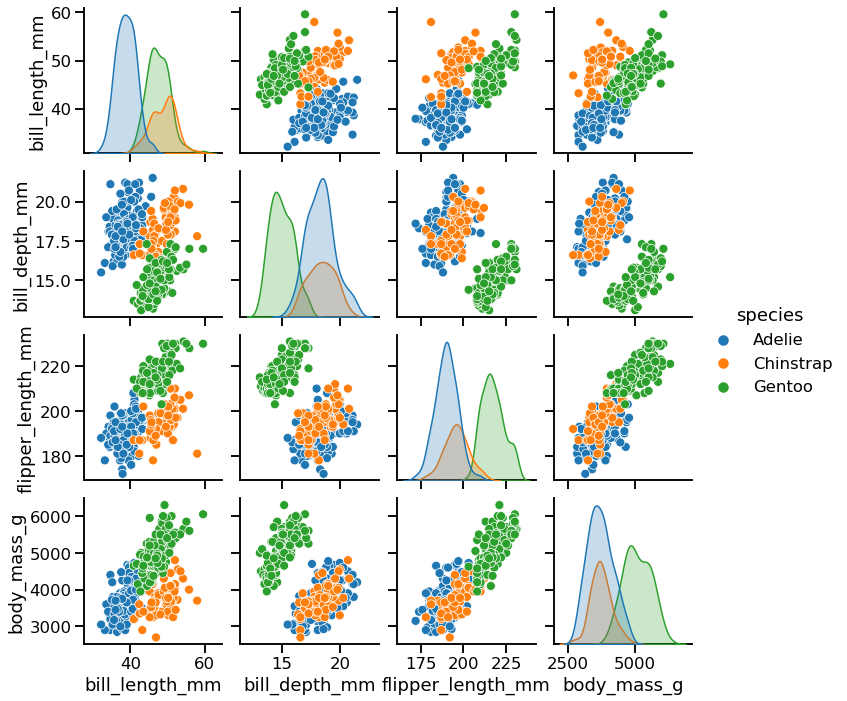

In [28]:
# add hue
sns.pairplot(penguins, hue="species")
plt.show()

 #### 6.2  pairplot in car dataset

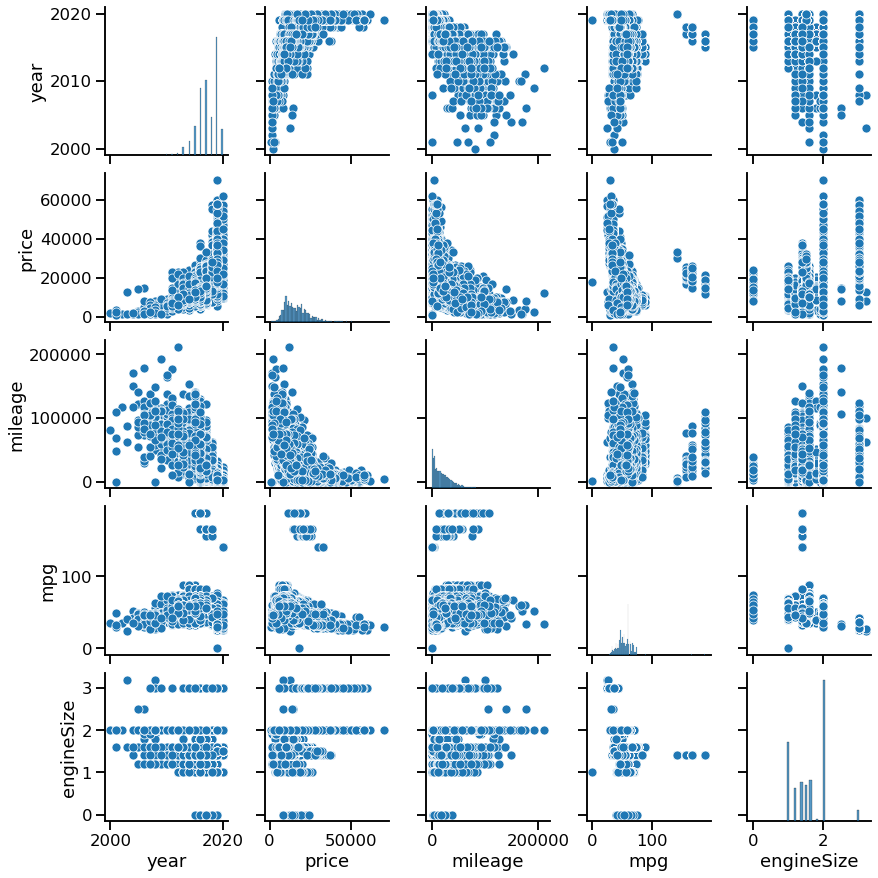

In [29]:
sns.pairplot(df) 
plt.show()

#### Removing the additional plots

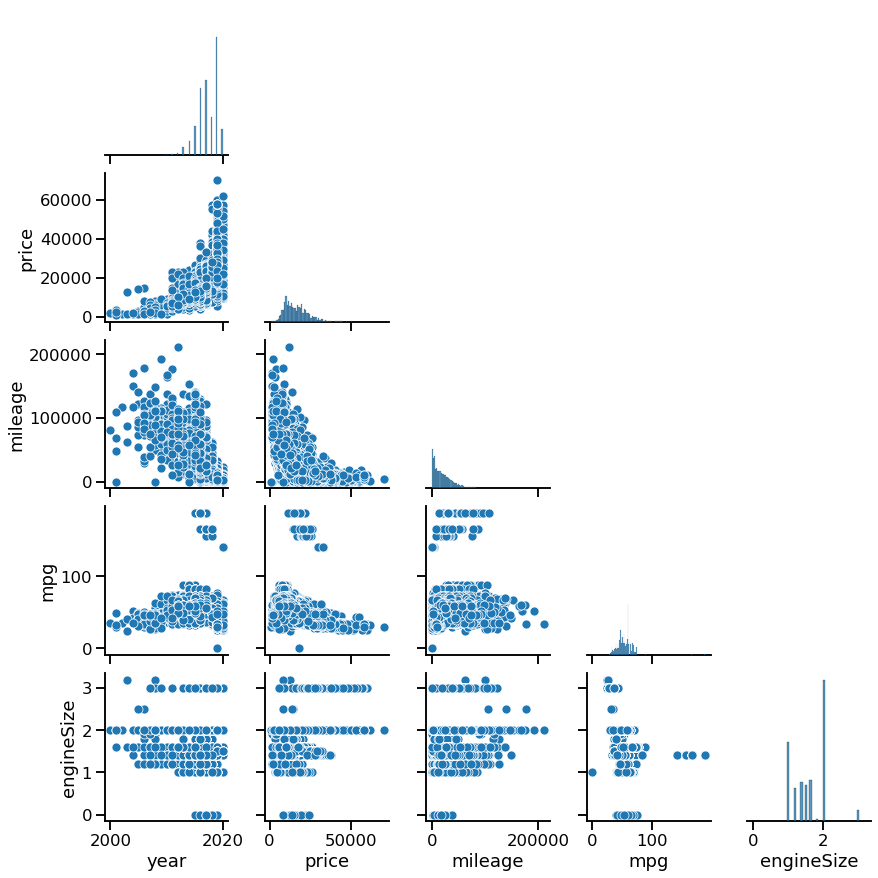

In [30]:
sns.pairplot(df, corner=True)

#### Adding categorical feature

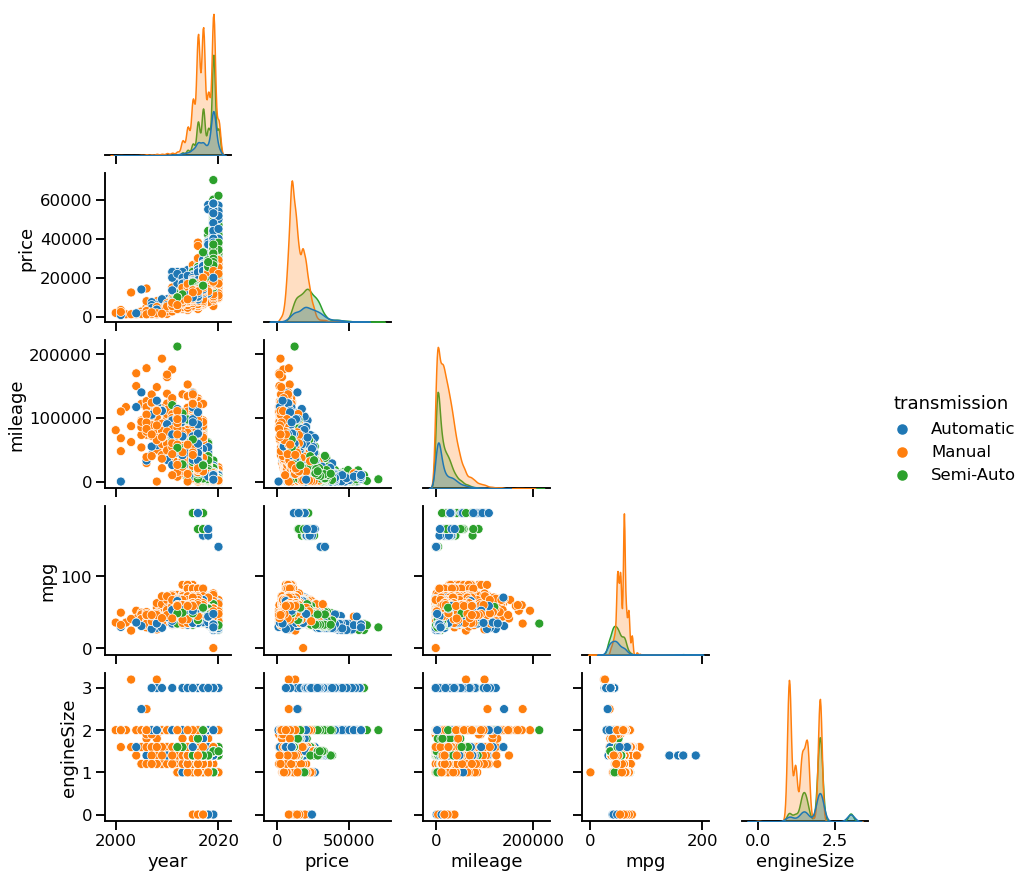

In [31]:
sns.pairplot(df, corner=True, hue="transmission")

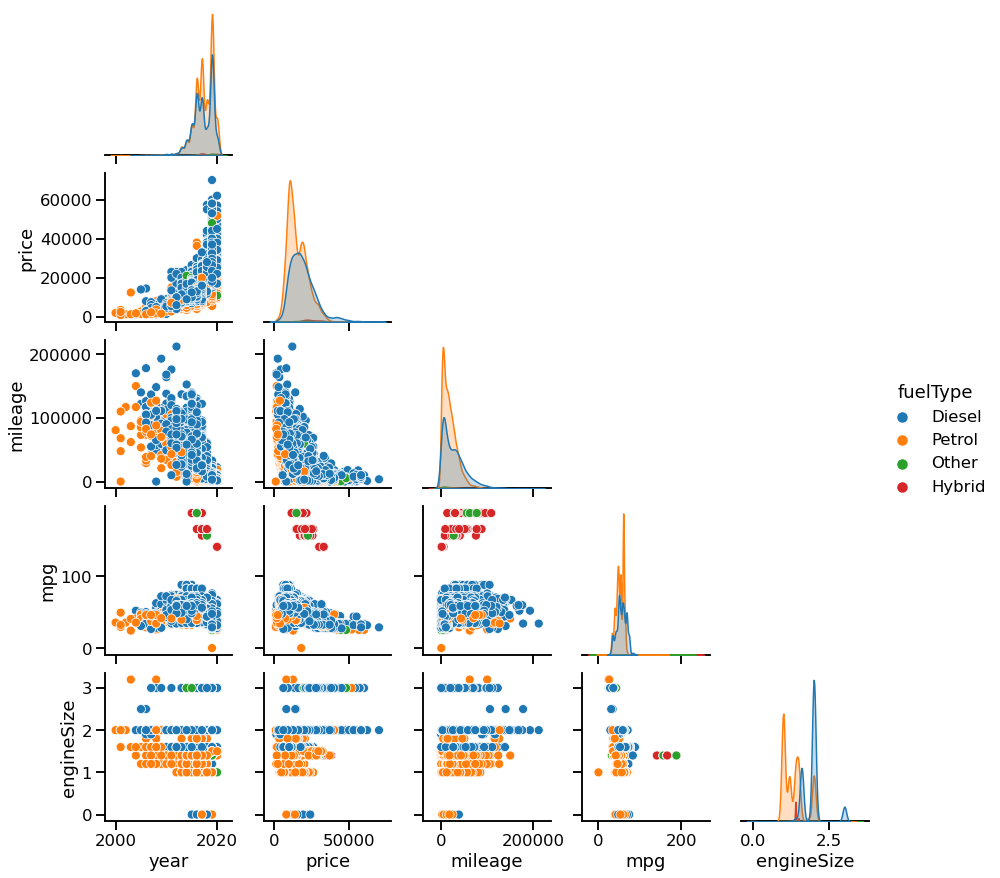

In [32]:
sns.pairplot(df, corner=True, hue="fuelType")

### 7. Box plot and Violin plot

<br> **Box plot**:
- Median(50th percentile): In the box plot, the median is displayed rather than the mean.
- Q1: The first quartile (25%) position.
- Q3: The third quartile (75%) position.
- Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25thpercentiles. It represents how 50% of the points were dispersed.
- Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.
- Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
# source:
Image(url= "https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png",width=500, height=300)

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
# source:
Image(url= "https://miro.medium.com/max/572/1*TTMOaNG1o4PgQd-e8LurMg.png",width=500, height=300)

<br> **comparison between Box and violin plot**:
The unquestionable advantage of the violin plot over the box plot is that , it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.

In [35]:
df.describe()

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


In [36]:
# finding data type separately
print(df['model'].dtypes)
print(df['year'].dtype)


object
int64


#### Getting numerical and categorical columns from whole dataset- using for loop

In [37]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)
#        print(num_cols)

print('numerical columns:',num_cols)

cat_cols = []

for col in df.columns:
    if df[col].dtypes == "O":
        cat_cols.append(col) 
#        print(cat_cols)

print('categorical columns:',cat_cols)

numerical columns: ['year', 'price', 'mileage', 'mpg', 'engineSize']
categorical columns: ['model', 'transmission', 'fuelType']


#### 7.1. Box plot

In [38]:
# make a single box plot
# plt.figure(figsize=(8,5))
# sns.boxplot(y = "price", data=df, showfliers=False)

#### 7.1.1 Box plot for all numerical variables

In [39]:
print(len(num_cols))
print(range(len(num_cols)))

5
range(0, 5)


index =  0 position =  1 column name =  year
index =  1 position =  2 column name =  price
index =  2 position =  3 column name =  mileage
index =  3 position =  4 column name =  mpg
index =  4 position =  5 column name =  engineSize


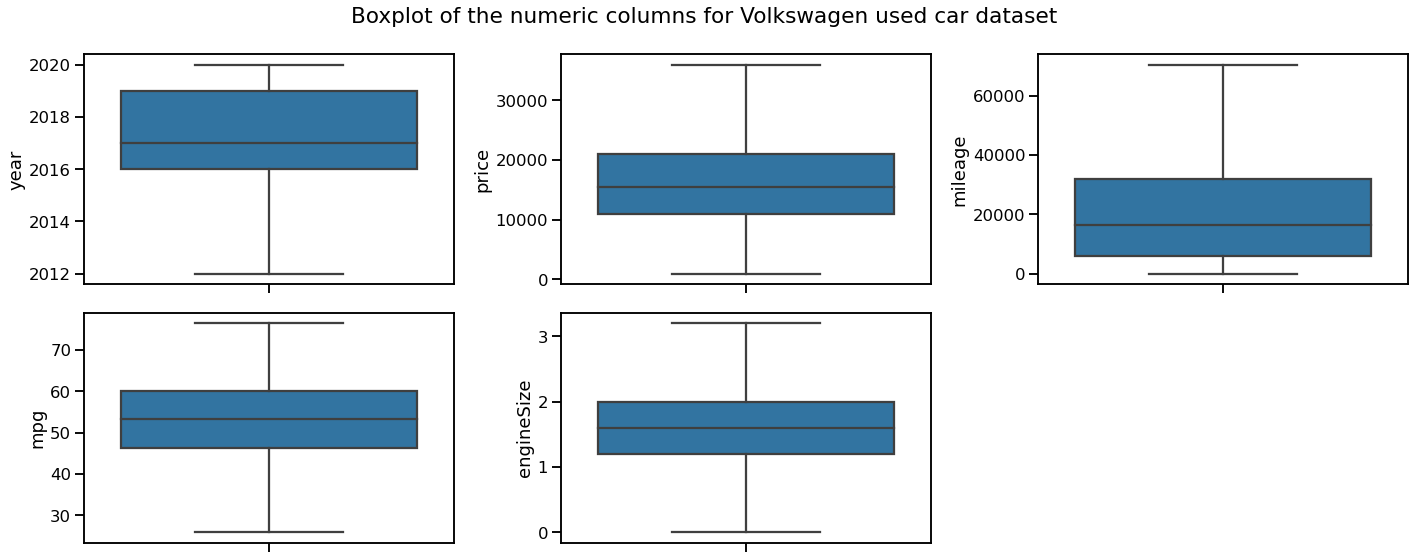

In [40]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    print("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot(2,3,index+1) # index starts from zero, position starts from 16
    sns.boxplot(y=num_cols[index], data=df, showfliers=False)  # showfliers=False to ignore outliers
    plt.xticks(rotation=90)

plt.suptitle("Boxplot of the numeric columns for Volkswagen used car dataset ")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year' column: oldest car is from 2012,earliest is from 2020, 25% percent cars from about 2016 , 50% of cars from between late 2016 and early 2017, 75% cars from about 2019.
- 'price' column: lowest is about 1K, heighest is about 32K, 25% percent cars have values about 11K, 50% of cars have  values about 16K, 75% of cars have values about 22K ( price is in US dollar)
- 'mileage' column: lowest is about 0, heighest is about 7K, 25% percent cars have mileage below 10K, 50% of cars have  mileage about 18K, 75% of cars have about 30K.

#### 7.1.2 Adding categorical features in the boxplot- transmission

In [41]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

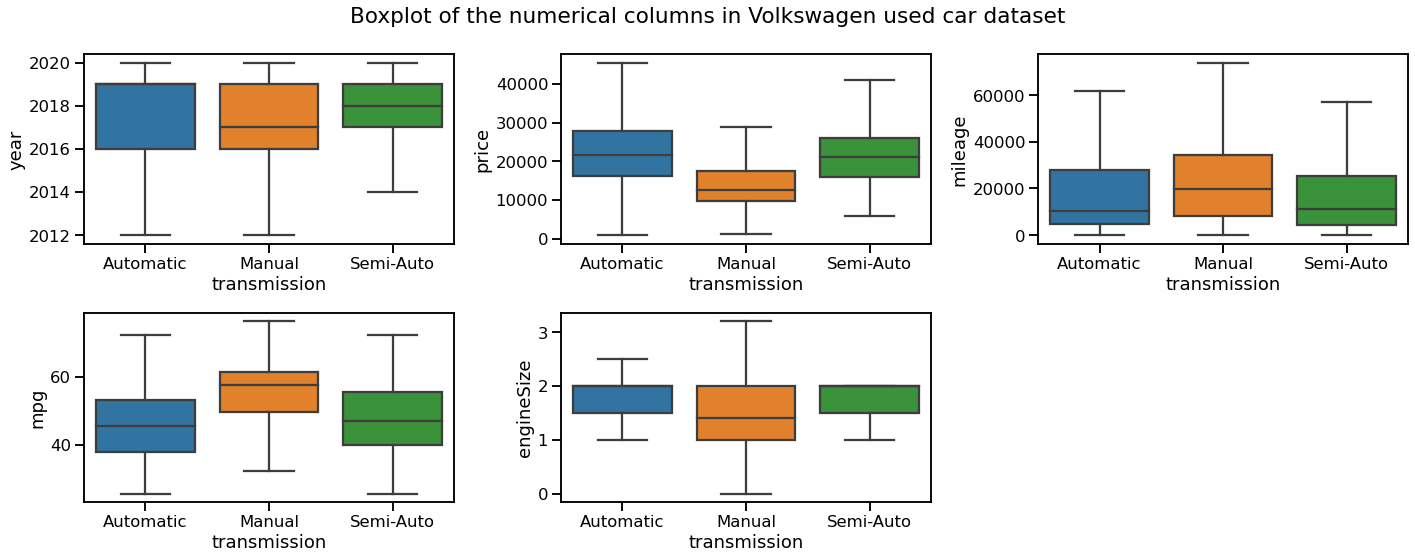

In [42]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=num_cols[index], x=df["transmission"], data=df, showfliers=False)

plt.suptitle("Boxplot of the numerical columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'price': 50% of manual cars are less costlier than automatic and semi-automatic cars.
- 'mielage': 50% of manual cars have more mileage than automatic and semi-automatic cars.
- 'mpg' : manual cars go further in a single gallon compared to other two categories.

#### 7.1.3  Adding categorical features in the boxplot- fuelType

In [43]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

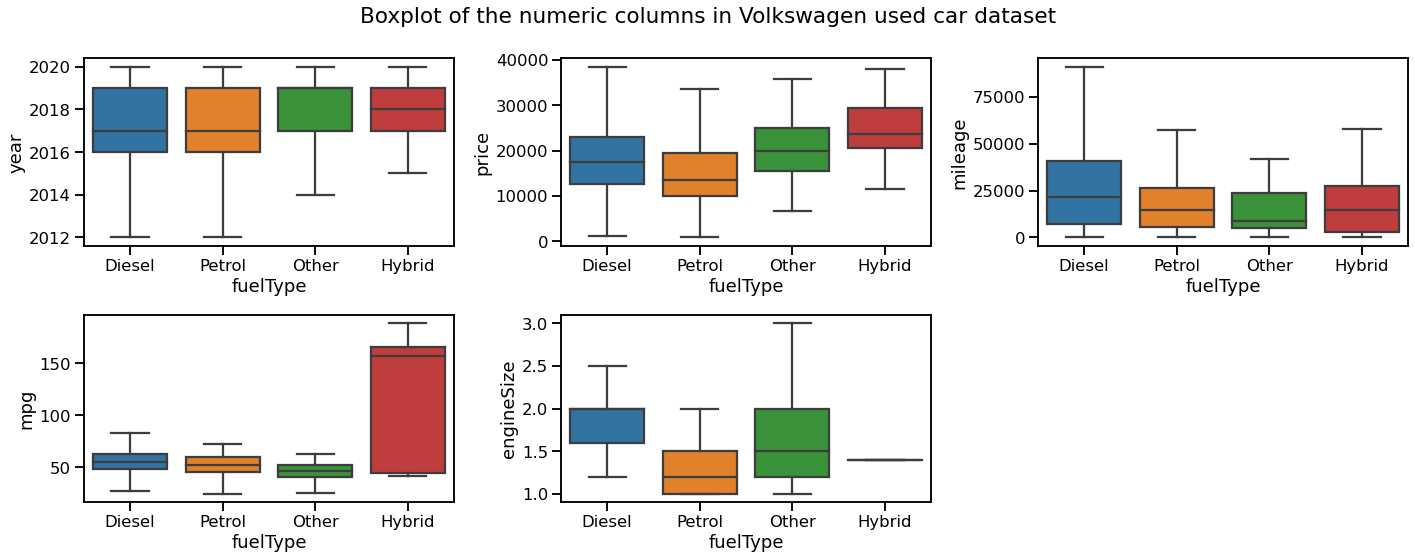

In [44]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=num_cols[index], x=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'price': hybrid cars are most expensive and petrol cars are cheapest than other fuelType cars.
- 'mielage': 50% of diesel cars have more mileage than other fuelTypes.
- 'mpg' : hybrid cars have greater mileage.

#### 7.1.4 Adding categorical features (hue) in the boxplot

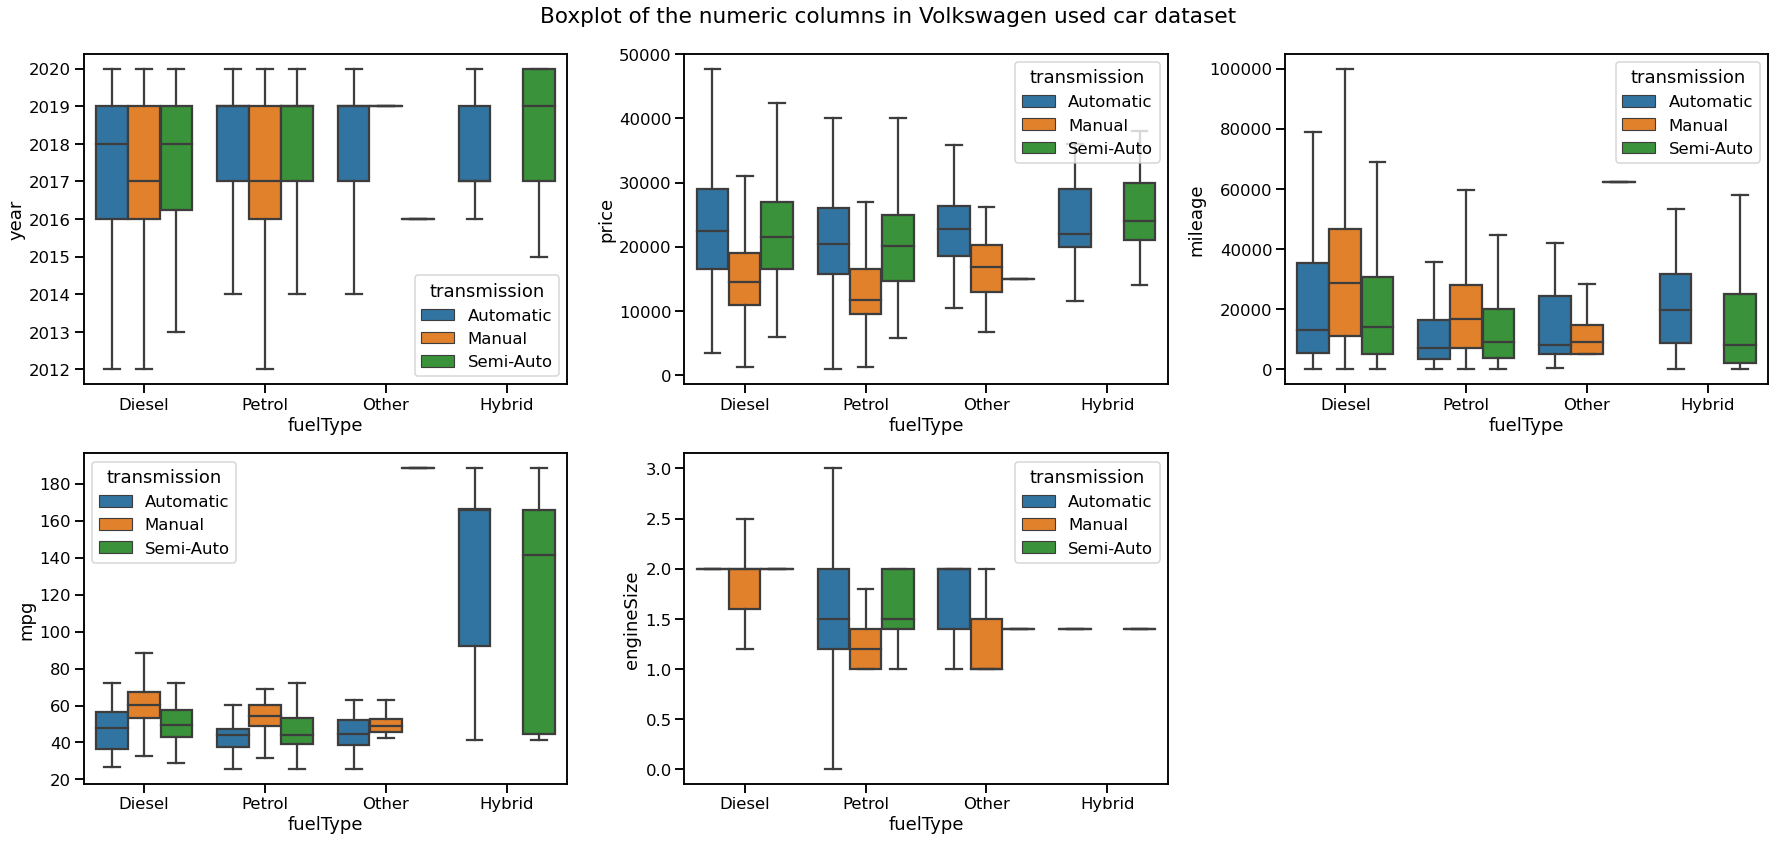

In [45]:
# to use hue , x, y both are needed
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=num_cols[index], x=df["fuelType"], hue=df["transmission"], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- hue makes it more complicated and congested to deduce any useful information.

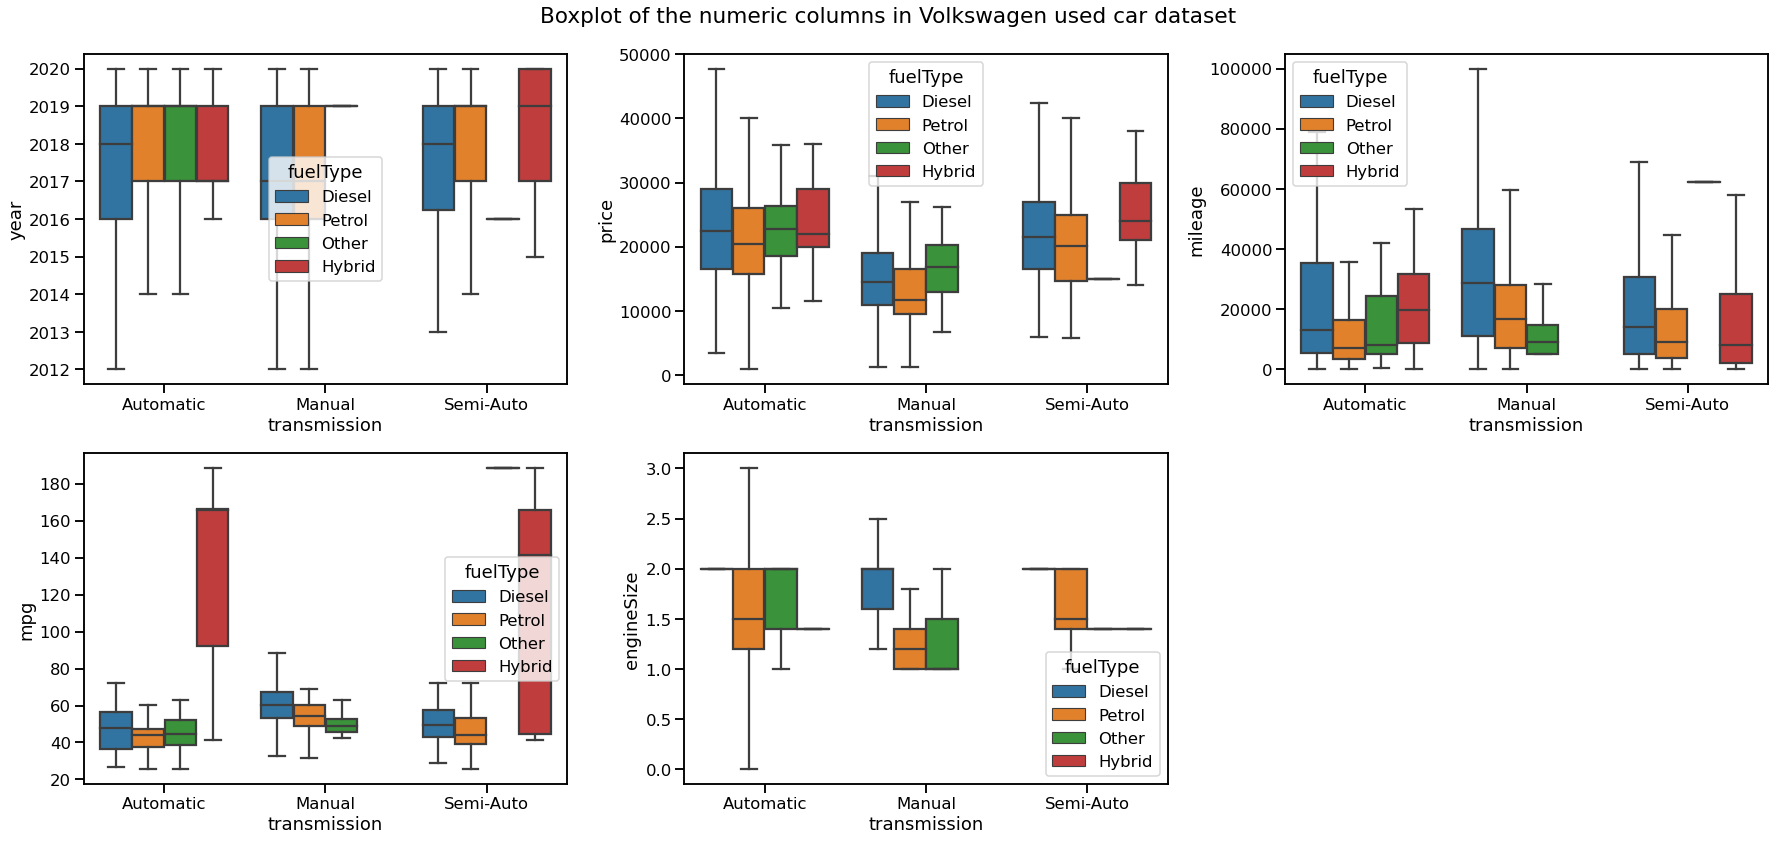

In [46]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=num_cols[index], x=df["transmission"], hue=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in Volkswagen used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- hue makes it more complicated and congested to deduce any useful information.

#### 7.2. Violin plot

In [47]:
df.describe()

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


#### 7.2.1 Violin plot for all numerical variables

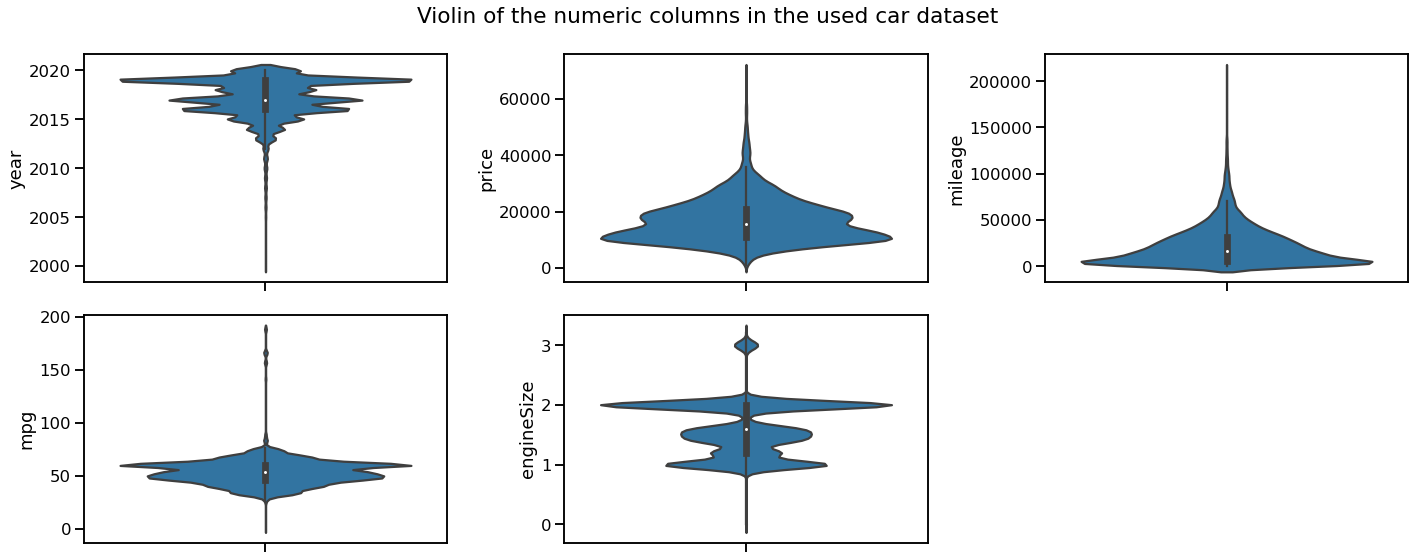

In [48]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=num_cols[index],data=df, showfliers=False)

plt.suptitle("Violin of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': most cars are from between 2015 to 2020.
- 'price': most cars are have values around 10K dollar .
- 'enginesize': significant number of cars have enginsize of 2.

#### 7.2.2 Adding categorical features in the violin plot- transmission

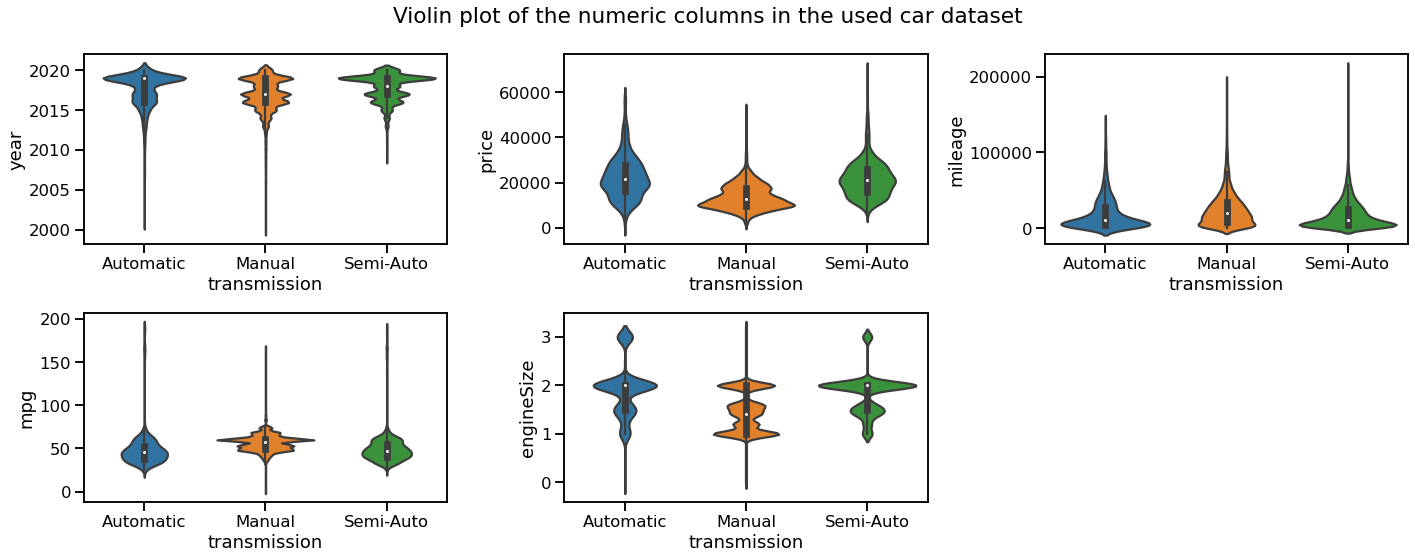

In [49]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=num_cols[index],x=df["transmission"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': all 3 types of cars are from around 2019.
- 'mpg': manual cars have high density beteen 50 to 60 miles per gallon .
- 'enginesize': for all 3 types, most cars have enginsize of 2.

#### 7.2.3 Adding categorical features in the violin plot- fuelType

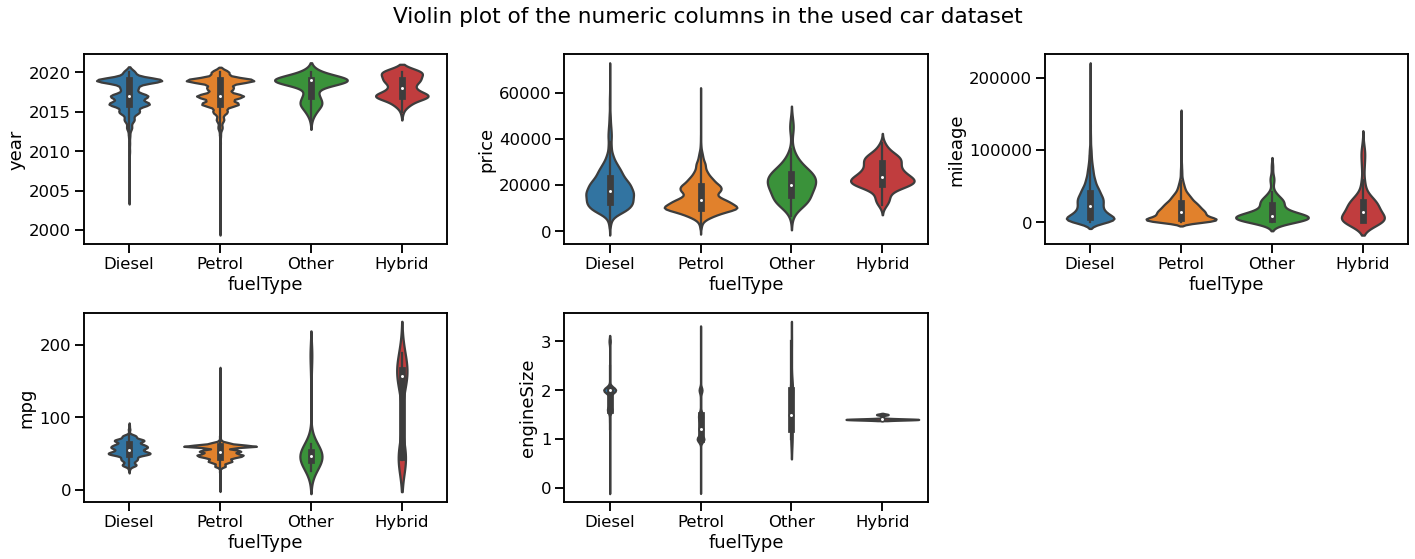

In [50]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=num_cols[index],x=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- 'year': hybrid cars are newer in the market,from early 2014 to 2020, on the other hand petrol cars are from 2000 to 2020.

#### 7.2.4 Adding categorical features (hue) in the violin plot

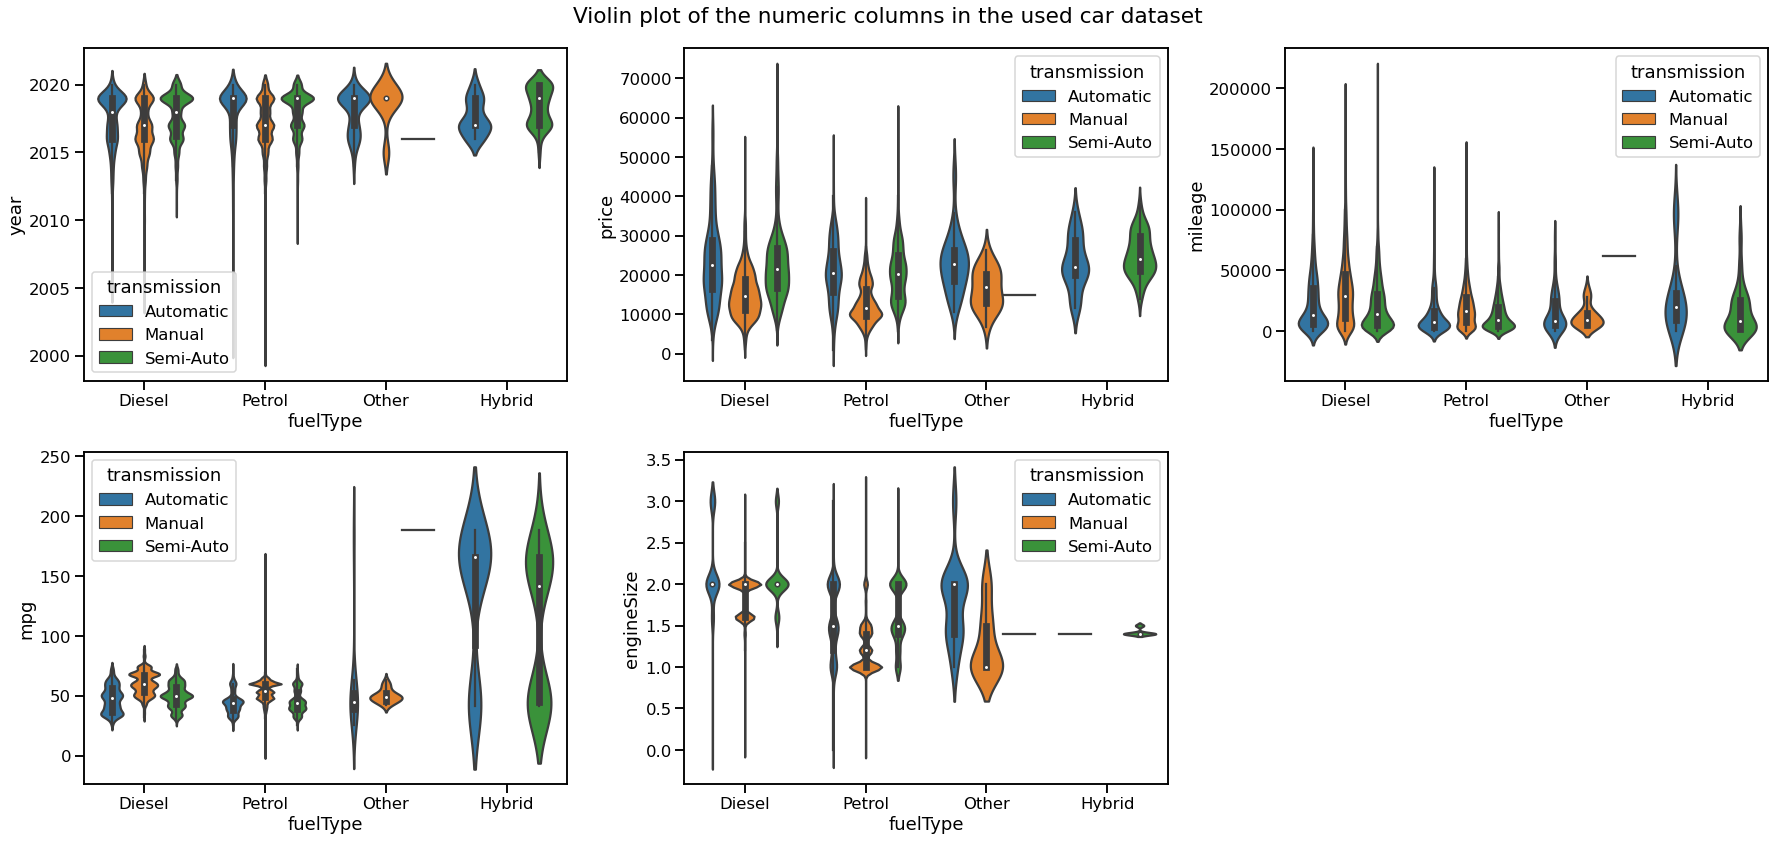

In [51]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.violinplot(y=num_cols[index], x=df["fuelType"], hue=df["transmission"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()
plt.show()

<br> **NOTE**: 
- hue makes it more complicated and congested to deduce any useful information.

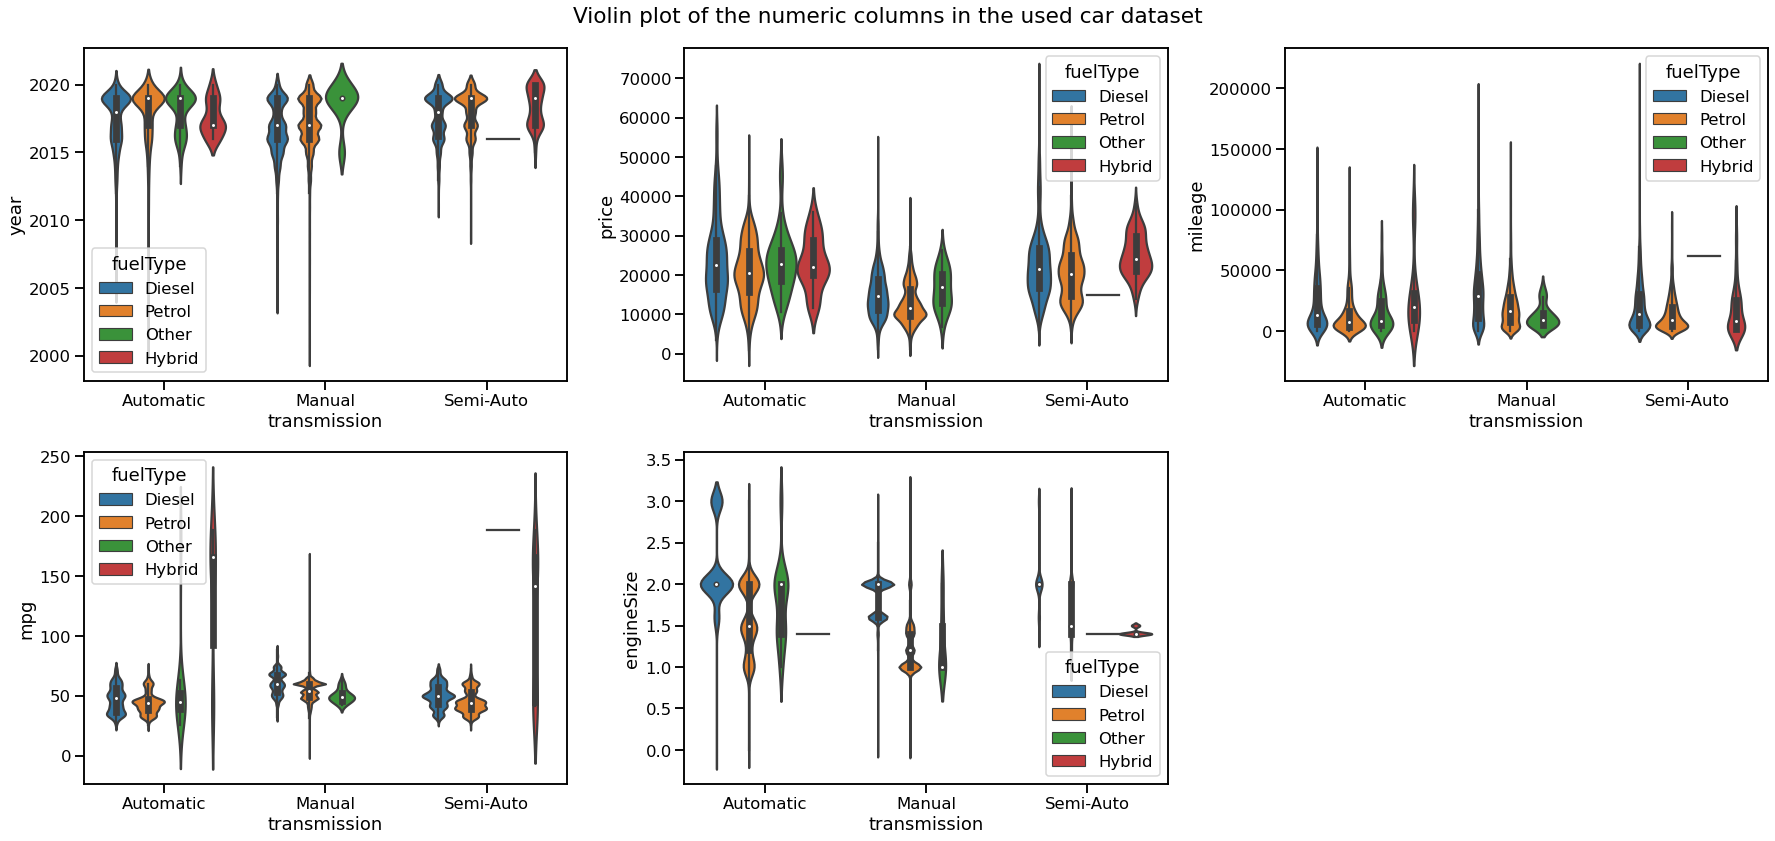

In [52]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.violinplot(y=num_cols[index], x=df["transmission"], hue=df["fuelType"], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the used car dataset")
plt.tight_layout()

<br> **NOTE**: 
- hue makes it more complicated and congested to deduce any useful information.

### --- The End ---